# Các vấn đề của data:

-có khoảng trống 2 đầu của tên đối tác ở 1 số dữ liệu
-có dấu ',' ở trong các dữ liệu số
-có các ô chứa ' -   '
-nhiều dữ liệu bị khuyết thiếu mà không thể dùng nội suy

In [83]:
# Import lib
import pandas as pd
import numpy as np
import mysql.connector as msql
from mysql.connector import Error
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
from geopy.geocoders import Nominatim

In [84]:


csv_file = './data/fdi_provinces_vi.csv'

data_prepare = pd.read_csv(csv_file, index_col=False, delimiter = ',')
data_prepare['Đối tác'] = data_prepare['Đối tác'].str.strip()

data_replace_1 = data_prepare.replace(',', '', regex=True)
data_replace_2 = data_replace_1.replace(' -   ', '', regex=True)
data_replace_2 = data_replace_2.fillna('')
# data_filled = data_replace_2.fillna(0)
#data = data_filled.copy()
data_replace_2.head(10)
# cover name of column to english
data_replace_2.columns = ['TT', 'Doi tac', 'So du an cap moi', 'Von dang ky cap moi'
                          , 'So luoc du an dieu chinh', 'Von dang ky dieu chinh', 'So luoc gop von', 'Gia tri gop von', 'Nam']

data_replace_2.head(10)

,TT,Doi tac,So du an cap moi,Von dang ky cap moi,So luoc du an dieu chinh,Von dang ky dieu chinh,So luoc gop von,Gia tri gop von,Nam
0,1,Bắc Ninh,133,149.6,103,3500.2,,,2015
1,2,TP. Hồ Chí Minh,570,2811.7,199,512.3,,,2015
2,3,Bình Dương,200,2465.8,95,487.0,,,2015
3,4,Trà Vinh,2,2526.8,,,,,2015
4,5,Đồng Nai,103,1471.9,71,475.1,,,2015
5,6,Hà Nội,352,910.7,84,177.7,,,2015
6,7,Hải Phòng,45,573.1,26,237.7,,,2015
7,8,Bà Rịa - Vũng Tàu,11,326.3,13,406.1,,,2015
8,9,Long An,119,308.7,42,268.4,,,2015
9,10,Tây Ninh,16,502.9,5,25.3,,,2015


In [85]:
# cover all data of data_replace_2 to string
data_replace_2 = data_replace_2.astype(str)
data_replace_2.dtypes

TT                          object
Doi tac                     object
So du an cap moi            object
Von dang ky cap moi         object
So luoc du an dieu chinh    object
Von dang ky dieu chinh      object
So luoc gop von             object
Gia tri gop von             object
Nam                         object
dtype: object

In [86]:
data_replace_2['So du an cap moi'] = data_replace_2['So du an cap moi'].apply(lambda x: re.sub(r"[_|-|(|)|,|\.]", '', x))


data_replace_2['Von dang ky cap moi'] = data_replace_2['Von dang ky cap moi'].apply(lambda x: re.sub(r"[(|)]", '', x))

data_replace_2['So luoc du an dieu chinh'] = data_replace_2['So luoc du an dieu chinh'].apply(lambda x: re.sub(r"[_|-|(|)|,|\.]", '', x))

data_replace_2['Von dang ky dieu chinh'] = data_replace_2['Von dang ky dieu chinh'].apply(lambda x: re.sub(r"[(|)]", '', x))

data_replace_2['So luoc gop von'] = data_replace_2['So luoc gop von'].apply(lambda x: re.sub(r"[_|-|(|)|,|\.]", '', x))

data_replace_2['Gia tri gop von'] = data_replace_2['Gia tri gop von'].apply(lambda x: re.sub(r"[(|)]", '', x))




In [87]:
# cover all the data to numeric of column 2 to 8
data_replace_2['So du an cap moi'] = pd.to_numeric(data_replace_2['So du an cap moi'])
data_replace_2['Von dang ky cap moi'] = pd.to_numeric(data_replace_2['Von dang ky cap moi'])
data_replace_2['So luoc du an dieu chinh'] = pd.to_numeric(data_replace_2['So luoc du an dieu chinh'])
data_replace_2['Von dang ky dieu chinh'] = pd.to_numeric(data_replace_2['Von dang ky dieu chinh'])
data_replace_2['So luoc gop von'] = pd.to_numeric(data_replace_2['So luoc gop von'])
data_replace_2['Gia tri gop von'] = pd.to_numeric(data_replace_2['Gia tri gop von'])
data_replace_2['Nam'] = pd.to_numeric(data_replace_2['Nam'])

In [88]:
# make number of von dang ky dieu chinh to positive
data_replace_2['Von dang ky dieu chinh'] = data_replace_2['Von dang ky dieu chinh'].abs()


In [89]:
# fill all null value with mode of column
data_replace_2['So du an cap moi'] = data_replace_2['So du an cap moi'].fillna(data_replace_2['So du an cap moi'].mode()[0])
data_replace_2['Von dang ky cap moi'] = data_replace_2['Von dang ky cap moi'].fillna(data_replace_2['Von dang ky cap moi'].mode()[0])
data_replace_2['So luoc du an dieu chinh'] = data_replace_2['So luoc du an dieu chinh'].fillna(data_replace_2['So luoc du an dieu chinh'].mode()[0])
data_replace_2['Von dang ky dieu chinh'] = data_replace_2['Von dang ky dieu chinh'].fillna(data_replace_2['Von dang ky dieu chinh'].mode()[0])
data_replace_2['So luoc gop von'] = data_replace_2['So luoc gop von'].fillna(data_replace_2['So luoc gop von'].mode()[0])
data_replace_2['Gia tri gop von'] = data_replace_2['Gia tri gop von'].fillna(data_replace_2['Gia tri gop von'].mode()[0])
data_replace_2['Nam'] = data_replace_2['Nam'].fillna(data_replace_2['Nam'].mode()[0])



In [90]:
data = data_replace_2.copy()
data.isnull().sum()


TT                          0
Doi tac                     0
So du an cap moi            0
Von dang ky cap moi         0
So luoc du an dieu chinh    0
Von dang ky dieu chinh      0
So luoc gop von             0
Gia tri gop von             0
Nam                         0
dtype: int64

In [91]:
data.describe()


,So du an cap moi,Von dang ky cap moi,So luoc du an dieu chinh,Von dang ky dieu chinh,So luoc gop von,Gia tri gop von,Nam
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,44.421739,280.851739,19.858696,137.780152,81.480435,117.886652,2018.536957
std,139.441152,558.069470,43.504985,347.098071,430.042808,554.803780,2.241601
min,1.000000,0.000000,1.000000,0.020000,1.000000,0.000000,2015.000000
25%,2.000000,6.240000,1.000000,10.000000,1.000000,0.140000,2017.000000
50%,6.000000,82.400000,2.000000,10.020000,5.000000,4.700000,2019.000000
75%,23.000000,303.945000,15.250000,95.870000,21.250000,29.230000,2020.000000
max,1320.000000,5041.050000,309.000000,3500.200000,5720.000000,6472.600000,2022.000000


# Tạo kết nối đến database sau khi sử lý dữ liệu

In [62]:
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE lab1a")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Error while connecting to MySQL 1007 (HY000): Can't create database 'lab1a'; database exists


In [63]:
try:
    conn = msql.connect(host='localhost', database='lab1a', user='root', password='')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS fdiProvinces;')
        print('Creating table....')
        
        #create table statement
        create_table_query = """
        CREATE TABLE fdiProvinces (
            ID INT,
            partner varchar(255),
            number_of_new_projects INT,
            initial_registered_capital DECIMAL(10, 2),
            number_of_project_adjustments INT,
            adjusted_registered_capital FLOAT,
            number_of_capital_contribution_to_purchase_shares INT,
            value_of_capital_investment FLOAT,
            year INT
            )
        """
        cursor.execute(create_table_query)
        print("Table is created....")

    # Loop
    for i, row in data.iterrows():
        insert_query = """
            INSERT INTO fdiProvinces (ID, partner, number_of_new_projects, initial_registered_capital, 
            number_of_project_adjustments, adjusted_registered_capital, number_of_capital_contribution_to_purchase_shares,
            value_of_capital_investment, year)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cursor.execute(insert_query, tuple(row))
        print("Record inserted")
        conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('lab1a',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record

In [64]:
# Execute query
sql = "SELECT * FROM lab1a.fdiProvinces"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

(1, 'Bắc Ninh', 133, Decimal('149.60'), 103, 3500.2, 1, 14.0, 2015)
(2, 'TP. Hồ Chí Minh', 570, Decimal('2811.70'), 199, 512.3, 1, 14.0, 2015)
(3, 'Bình Dương', 200, Decimal('2465.80'), 95, 487.0, 1, 14.0, 2015)
(4, 'Trà Vinh', 2, Decimal('2526.80'), 1, 10.0, 1, 14.0, 2015)
(5, 'Đồng Nai', 103, Decimal('1471.90'), 71, 475.1, 1, 14.0, 2015)
(6, 'Hà Nội', 352, Decimal('910.70'), 84, 177.7, 1, 14.0, 2015)
(7, 'Hải Phòng', 45, Decimal('573.10'), 26, 237.7, 1, 14.0, 2015)
(8, 'Bà Rịa - Vũng Tàu', 11, Decimal('326.30'), 13, 406.1, 1, 14.0, 2015)
(9, 'Long An', 119, Decimal('308.70'), 42, 268.4, 1, 14.0, 2015)
(10, 'Tây Ninh', 16, Decimal('502.90'), 5, 25.3, 1, 14.0, 2015)
(11, 'Hải Dương', 28, Decimal('269.90'), 19, 137.3, 1, 14.0, 2015)
(12, 'Bắc Giang', 51, Decimal('223.20'), 22, 182.9, 1, 14.0, 2015)
(13, 'Quảng Ninh', 10, Decimal('373.90'), 4, 18.4, 1, 14.0, 2015)
(14, 'Vĩnh Phúc', 34, Decimal('273.20'), 16, 104.4, 1, 14.0, 2015)
(15, 'Hà Nam', 34, Decimal('288.10'), 15, 50.4, 1, 14.0, 2

# Bắt đầu khai thác các dữ liệu

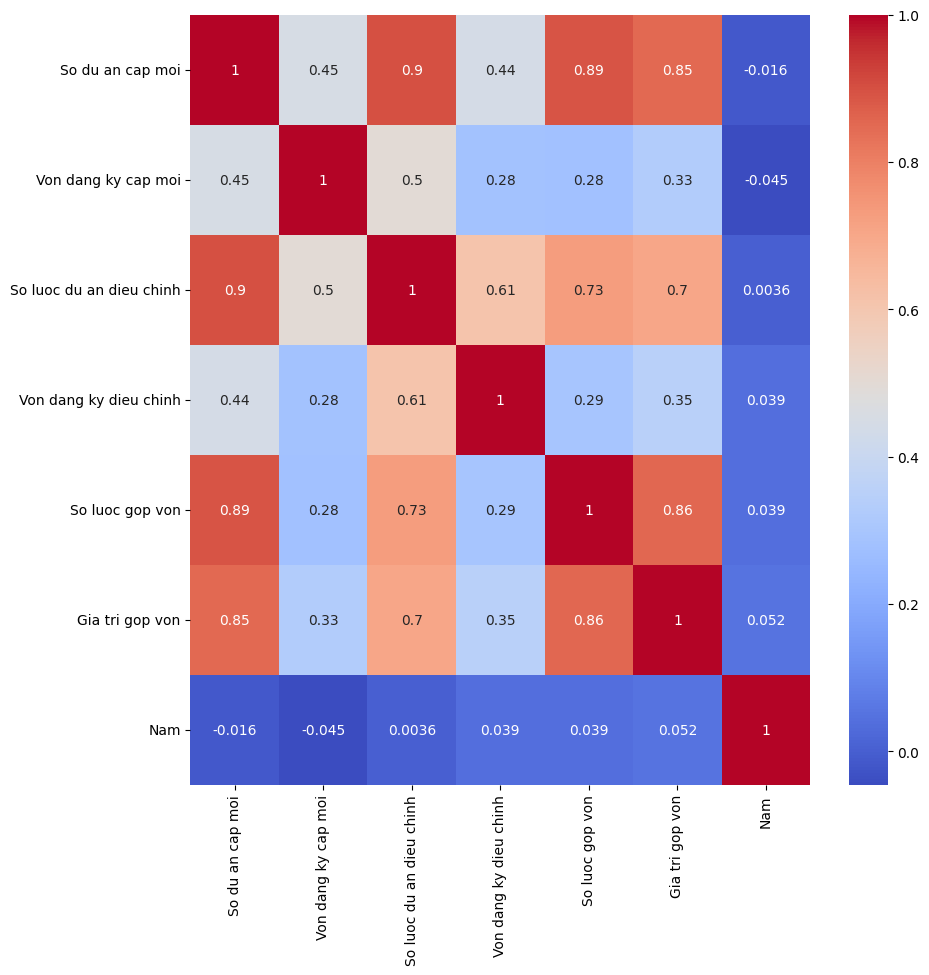

In [92]:
# draw graph to show is there any relationship between number of new projects and adjusted registered capital by heat map
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [95]:
# get the latitude and longitude of each province in Vietnam

# get the latitude and longitude of each province in Vietnam
def get_location(province):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(province, timeout=10)
    return location.latitude, location.longitude

# get list of province in Vietnam
province_list = data['Doi tac'].unique()
# create dict of latitude and longitude of each provinct in Vietnam
province_location = {}
for province in province_list:
    province_location[province] = get_location(province)
    
# map province_location to data
data['latitude'] = data['Doi tac'].map(lambda x: province_location[x][0])
data['longitude'] = data['Doi tac'].map(lambda x: province_location[x][1])








In [135]:
# Calculate sum of von dang ky cap moi, von dang ky dieu chinh,  gia tri gop von of all province in each year
sum_von_dang_ky_cap_moi = data.groupby('Nam')['Von dang ky cap moi'].sum()
sum_von_dang_ky_dieu_chinh = data.groupby('Nam')['Von dang ky dieu chinh'].sum()
sum_gia_tri_gop_von = data.groupby('Nam')['Gia tri gop von'].sum()
sum_tong_von = sum_von_dang_ky_cap_moi + sum_von_dang_ky_dieu_chinh + sum_gia_tri_gop_von
# draw graph to show sum of von dang ky cap moi, von dang ky dieu chinh,  gia tri gop von of all province in each year with px
fig = px.line(data_frame=sum_von_dang_ky_cap_moi, x=sum_von_dang_ky_cap_moi.index, y=sum_von_dang_ky_cap_moi.values, title='Von dang ky cap moi cua Viet Nam trong cac nam')
fig.show()
fig = px.line(data_frame=sum_von_dang_ky_dieu_chinh, x=sum_von_dang_ky_dieu_chinh.index, y=sum_von_dang_ky_dieu_chinh.values, title='Von dang ky dieu chinh cua Viet Nam trong cac nam')
fig.show()
fig = px.line(data_frame=sum_gia_tri_gop_von, x=sum_gia_tri_gop_von.index, y=sum_gia_tri_gop_von.values, title='Gia tri gop von cua Viet Nam trong cac nam')
fig.show()
# draw graph to show sum tong von of all province and percentage of sum von dang ky cap moi, von dang ky dieu chinh,  gia tri gop von of all province in each year with px
fig = px.line(data_frame=sum_tong_von, x=sum_tong_von.index, y=sum_tong_von.values, title='FDI cua Viet Nam trong cac nam')
fig.show()






In [137]:
# Calculate sum of so du an cap moi, so luoc du an dieu chinh,  so luoc gop von of all province in each year
sum_so_du_an_cap_moi = data.groupby('Nam')['So du an cap moi'].sum()
sum_so_luong_du_an_dieu_chinh = data.groupby('Nam')['So luoc du an dieu chinh'].sum()
sum_so_luong_gop_von = data.groupby('Nam')['So luoc gop von'].sum()
# draw graph to show sum of so du an cap moi, so luoc du an dieu chinh,  so luoc gop von of all province in each year with px
fig = px.line(data_frame=sum_so_du_an_cap_moi, x=sum_so_du_an_cap_moi.index, y=sum_so_du_an_cap_moi.values, title='So du an cap moi cua Viet Nam trong cac nam')
fig.show()
fig = px.line(data_frame=sum_so_luong_du_an_dieu_chinh, x=sum_so_luong_du_an_dieu_chinh.index, y=sum_so_luong_du_an_dieu_chinh.values, title='So luoc du an dieu chinh cua Viet Nam trong cac nam')
fig.show()
fig = px.line(data_frame=sum_so_luong_gop_von, x=sum_so_luong_gop_von.index, y=sum_so_luong_gop_von.values, title='So luoc gop von cua Viet Nam trong cac nam')
fig.show()



In [162]:
# draw graph to overview the trend of fdi in each province in Vietnam using px
fig = px.scatter_geo(data, lat='latitude', lon='longitude', color='Doi tac', size='So du an cap moi', animation_frame='Nam',
                        projection='natural earth')
fig.update_geos(
    visible=False, resolution=110, scope="asia",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [160]:

# draw tree map the province by number of new projects in Vietnam each year using plotly
fig = px.treemap(data_frame=data, path=['Nam', 'Doi tac'], values='So du an cap moi', title='So du an cap moi cua Viet Nam trong cac nam')
fig.show()
# draw tree map the province by von dang ky cap moi in Vietnam each year using plotl
fig = px.treemap(data_frame=data, path=['Nam', 'Doi tac'], values='Von dang ky cap moi', title='Von dang ky cap moi cua Viet Nam trong cac nam')
fig.show()






  




